In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/金融大數據/多模態/AAPL.csv')
df.index = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-08-04,2021-08-04,147.270004,147.789993,146.279999,146.949997,146.115219,56368300
2021-08-05,2021-08-05,146.979996,147.839996,146.169998,147.059998,146.224594,46397700
2021-08-06,2021-08-06,146.350006,147.110001,145.630005,146.139999,145.527512,54126800
2021-08-09,2021-08-09,146.199997,146.699997,145.520004,146.089996,145.477722,48908700
2021-08-10,2021-08-10,146.440002,147.710007,145.300003,145.600006,144.989792,69023100


In [5]:
import cv2

image = [] #x
for i in range(0, 233):
  im = cv2.imread('/content/drive/MyDrive/論文/dataset/'+str(i)+'.png')
  im = np.asarray(im)
  image.append(im/255)
  image1 = np.asarray(image)
print(len(image1), type(image1[0]), image1[0].shape)


233 <class 'numpy.ndarray'> (84, 84, 3)


In [6]:
y = []
for i in range(20, len(df)):
  close = np.asarray(df['Close'][i])
  close1 = np.asarray(df['Close'][i-1])
  change = close - close1
  if change>0:
    change = 1 #漲
  else:
    change = 0 #跌
  y.append(change)
  y1 = np.asarray(y)
print(len(y1), type(y1), y1[0].shape)

233 <class 'numpy.ndarray'> ()


CNN模型

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import Model, layers
from tensorflow.keras.optimizers import Adam

model_input = layers.Input(shape=(84,84,3),name='cnn_input')
x = layers.Conv2D(32,3,activation='relu',name='Conv2D-32')(model_input)
x = layers.MaxPooling2D(name='max-pooling1')(x)
x = layers.Conv2D(48,3,activation='relu',name='Conv2D-48')(x)
x = layers.MaxPooling2D(name='max-pooling2')(x)
x = layers.Conv2D(64,3,activation='relu',name='Conv2D-64')(x)
x = layers.MaxPooling2D(name='max-pooling3')(x)
x = layers.Flatten(name='cnn_flatten')(x)
x = layers.Dense(2,activation='relu',name='cnn_dense1')(x)
close_price_change = layers.Dense(1,activation='sigmoid',name='cnn_output')(x)

CNN_model = Model(model_input, close_price_change, name='CNN_model')
adam = Adam(learning_rate=0.5)
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
CNN_model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_input (InputLayer)      [(None, 84, 84, 3)]       0         
                                                                 
 Conv2D-32 (Conv2D)          (None, 82, 82, 32)        896       
                                                                 
 max-pooling1 (MaxPooling2D)  (None, 41, 41, 32)       0         
                                                                 
 Conv2D-48 (Conv2D)          (None, 39, 39, 48)        13872     
                                                                 
 max-pooling2 (MaxPooling2D)  (None, 19, 19, 48)       0         
                                                                 
 Conv2D-64 (Conv2D)          (None, 17, 17, 64)        27712     
                                                                 
 max-pooling3 (MaxPooling2D)  (None, 8, 8, 64)         0 

In [9]:
from sklearn.model_selection import train_test_split

image1 = image1.reshape(-1, 84, 84, 3)
x_train, x_test, y_train, y_test = train_test_split(image1, y1, test_size=0.2, random_state=100)
history = CNN_model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=16)   
CNN_model.evaluate(x_test, y_test) 

Epoch 1/50
10/10 [==============================] - 2s 154ms/step - loss: 0.6911 - accuracy: 0.5338 - val_loss: 0.6892 - val_accuracy: 0.5526
Epoch 2/50
10/10 [==============================] - 2s 157ms/step - loss: 0.6910 - accuracy: 0.5338 - val_loss: 0.6892 - val_accuracy: 0.5526
Epoch 3/50
10/10 [==============================] - 2s 155ms/step - loss: 0.6910 - accuracy: 0.5338 - val_loss: 0.6892 - val_accuracy: 0.5526
Epoch 4/50
10/10 [==============================] - 2s 156ms/step - loss: 0.6911 - accuracy: 0.5338 - val_loss: 0.6891 - val_accuracy: 0.5526
Epoch 5/50
10/10 [==============================] - 2s 157ms/step - loss: 0.6910 - accuracy: 0.5338 - val_loss: 0.6891 - val_accuracy: 0.5526
Epoch 6/50
10/10 [==============================] - 2s 157ms/step - loss: 0.6910 - accuracy: 0.5338 - val_loss: 0.6891 - val_accuracy: 0.5526
Epoch 7/50
10/10 [==============================] - 2s 154ms/step - loss: 0.6910 - accuracy: 0.5338 - val_loss: 0.6891 - val_accuracy: 0.5526
Epoch 

[0.7012423276901245, 0.44680851697921753]

In [10]:
df1 = pd.read_csv('/content/drive/MyDrive/金融大數據/多模態/AAPL.csv', index_col=0)
df1 = df1.drop(['Volume','Adj Close'], axis=1)
df1

,Open,High,Low,Close
Date,,,,
2021-08-04,147.270004,147.789993,146.279999,146.949997
2021-08-05,146.979996,147.839996,146.169998,147.059998
2021-08-06,146.350006,147.110001,145.630005,146.139999
2021-08-09,146.199997,146.699997,145.520004,146.089996
2021-08-10,146.440002,147.710007,145.300003,145.600006
...,...,...,...,...
2022-07-29,161.240005,163.630005,159.500000,162.509995
2022-08-01,161.009995,163.589996,160.889999,161.509995
2022-08-02,160.100006,162.410004,159.630005,160.009995


In [11]:
highest_price = df1["High"].max()
lowest_price = df1["Low"].min()

for col in ['Open','High','Low','Close']:
        df1[col] = (df1[col] - lowest_price)/(highest_price-lowest_price)
df1

,Open,High,Low,Close
Date,,,,
2021-08-04,0.338219,0.347866,0.319852,0.332282
2021-08-05,0.332839,0.348794,0.317811,0.334323
2021-08-06,0.321150,0.335251,0.307792,0.317254
2021-08-09,0.318367,0.327644,0.305752,0.316327
2021-08-10,0.322820,0.346382,0.301670,0.307236
...,...,...,...,...
2022-07-29,0.597403,0.641744,0.565121,0.620965
2022-08-01,0.593135,0.641002,0.590909,0.602412
2022-08-02,0.576252,0.619110,0.567533,0.574583


In [14]:
y2 = []
for i in range(20, len(df1)):
  close = np.asarray(df1['Close'][i])
  close1 = np.asarray(df1['Close'][i-1])
  change = close - close1
  if change >0:
    change = 1 #漲
  else:
    change = 0 #跌
  y2.append(change)
  y3 = np.asarray(y2)
print(len(y3), type(y3), y3.shape, y3)

233 <class 'numpy.ndarray'> (233,) [1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0]


In [15]:
x3=[]
step=20
for i in range(0,len(df1)-step):
  x3.append(df1.iloc[i:i+step,:].values)
x3 = np.array(x3)
print(x3, x3.shape)

[[[0.33821907 0.34786636 0.31985163 0.33228202]
  [0.33283859 0.34879406 0.3178108  0.33432286]
  [0.32115047 0.33525056 0.30779238 0.31725423]
  ...
  [0.34211503 0.36567725 0.33005577 0.36289443]
  [0.37031547 0.45361796 0.36307987 0.44675321]
  [0.43821905 0.44081644 0.41280142 0.42282013]]

 [[0.33283859 0.34879406 0.3178108  0.33432286]
  [0.32115047 0.33525056 0.30779238 0.31725423]
  [0.31836737 0.3276438  0.30575154 0.31632653]
  ...
  [0.37031547 0.45361796 0.36307987 0.44675321]
  [0.43821905 0.44081644 0.41280142 0.42282013]
  [0.44137301 0.48126157 0.43228199 0.43543596]]

 [[0.32115047 0.33525056 0.30779238 0.31725423]
  [0.31836737 0.3276438  0.30575154 0.31632653]
  [0.32282015 0.34638239 0.30166989 0.30723581]
  ...
  [0.43821905 0.44081644 0.41280142 0.42282013]
  [0.44137301 0.48126157 0.43228199 0.43543596]
  [0.46066786 0.47643792 0.43339512 0.45658621]]

 ...

 [[0.16196678 0.23320976 0.14638216 0.23228206]
  [0.2283861  0.27977736 0.22337675 0.25751396]
  [0.26437

In [16]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=100)
print(x_train3.shape, y_train3.shape)

(186, 20, 4) (186,)


LSTM模型

In [91]:
import keras
from tensorflow.keras import layers, Model
from keras.layers import Dense, LSTM, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

input = layers.Input(shape=(20,4), name='lstm_input')
s = layers.LSTM(units=32,activation='relu',return_sequences=True, name='lstm1')(input)
s = layers.Dropout(0.4,name='lstm_dropout1')(s)
s = layers.LSTM(units=16,activation='relu',name='lstm2')(s)
s = layers.Dropout(0.4,name='lstm_dropout2')(s)
s = layers.Dense(2, activation='relu', name='lstm_dense1')(s)
close_price_change = layers.Dense(1,activation='linear',name='lstm_output')(s)

LSTM_model = Model(input, close_price_change, name='LSTM_model')
adam = Adam(learning_rate=0.01)
LSTM_model.compile(optimizer='adam',loss=['mse','mse'], metrics=['accuracy'])
LSTM_model.summary()

history = LSTM_model.fit(x=x_train3, y=y_train3, validation_split=0.2, shuffle=True, epochs=50, batch_size=16, verbose=1)  


Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 20, 4)]           0         
                                                                 
 lstm1 (LSTM)                (None, 20, 32)            4736      
                                                                 
 lstm_dropout1 (Dropout)     (None, 20, 32)            0         
                                                                 
 lstm2 (LSTM)                (None, 16)                3136      
                                                                 
 lstm_dropout2 (Dropout)     (None, 16)                0         
                                                                 
 lstm_dense1 (Dense)         (None, 2)                 34        
                                                                 
 lstm_output (Dense)         (None, 1)                 3

In [92]:
LSTM_model.evaluate(x_test3, y_test3)

2/2 [==============================] - 0s 9ms/step - loss: 0.2619 - accuracy: 0.5957


[0.26187625527381897, 0.5957446694374084]

多模態(CNN+LSTM)：決策層融合

In [93]:
CNN_model.trainable = False
LSTM_model.trainable = False

LSTM_output = LSTM_model.get_layer('lstm_output').output
CNN_output = CNN_model.get_layer('cnn_output').output
concatenated = layers.concatenate([LSTM_output,CNN_output],axis=-1, name='concate1')
concatenated = layers.Dense(32, activation='relu', name='concate2')(concatenated)
concatenated = layers.Dropout(0.2, name='concate_dropout1')(concatenated)
concatenated = layers.Dense(16, activation='relu', name='concate3')(concatenated)
concatenated = layers.Dropout(0.2, name='concate_dropout2')(concatenated)
concatenated = layers.Dense(2, activation='relu', name='concate4')(concatenated)
concate_output = layers.Dense(1, activation='linear', name='concate_output')(concatenated)

LSTM_CNN_model = Model([LSTM_model.input,CNN_model.input], concate_output, name='LSTM_CNN_model')
adam = Adam(learning_rate=0.01)
LSTM_CNN_model.compile(optimizer='adam',loss=['binary_crossentropy'], metrics=['accuracy'])
LSTM_CNN_model.summary()

Model: "LSTM_CNN_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cnn_input (InputLayer)         [(None, 84, 84, 3)]  0           []                               
                                                                                                  
 Conv2D-32 (Conv2D)             (None, 82, 82, 32)   896         ['cnn_input[0][0]']              
                                                                                                  
 max-pooling1 (MaxPooling2D)    (None, 41, 41, 32)   0           ['Conv2D-32[0][0]']              
                                                                                                  
 lstm_input (InputLayer)        [(None, 20, 4)]      0           []                               
                                                                                     

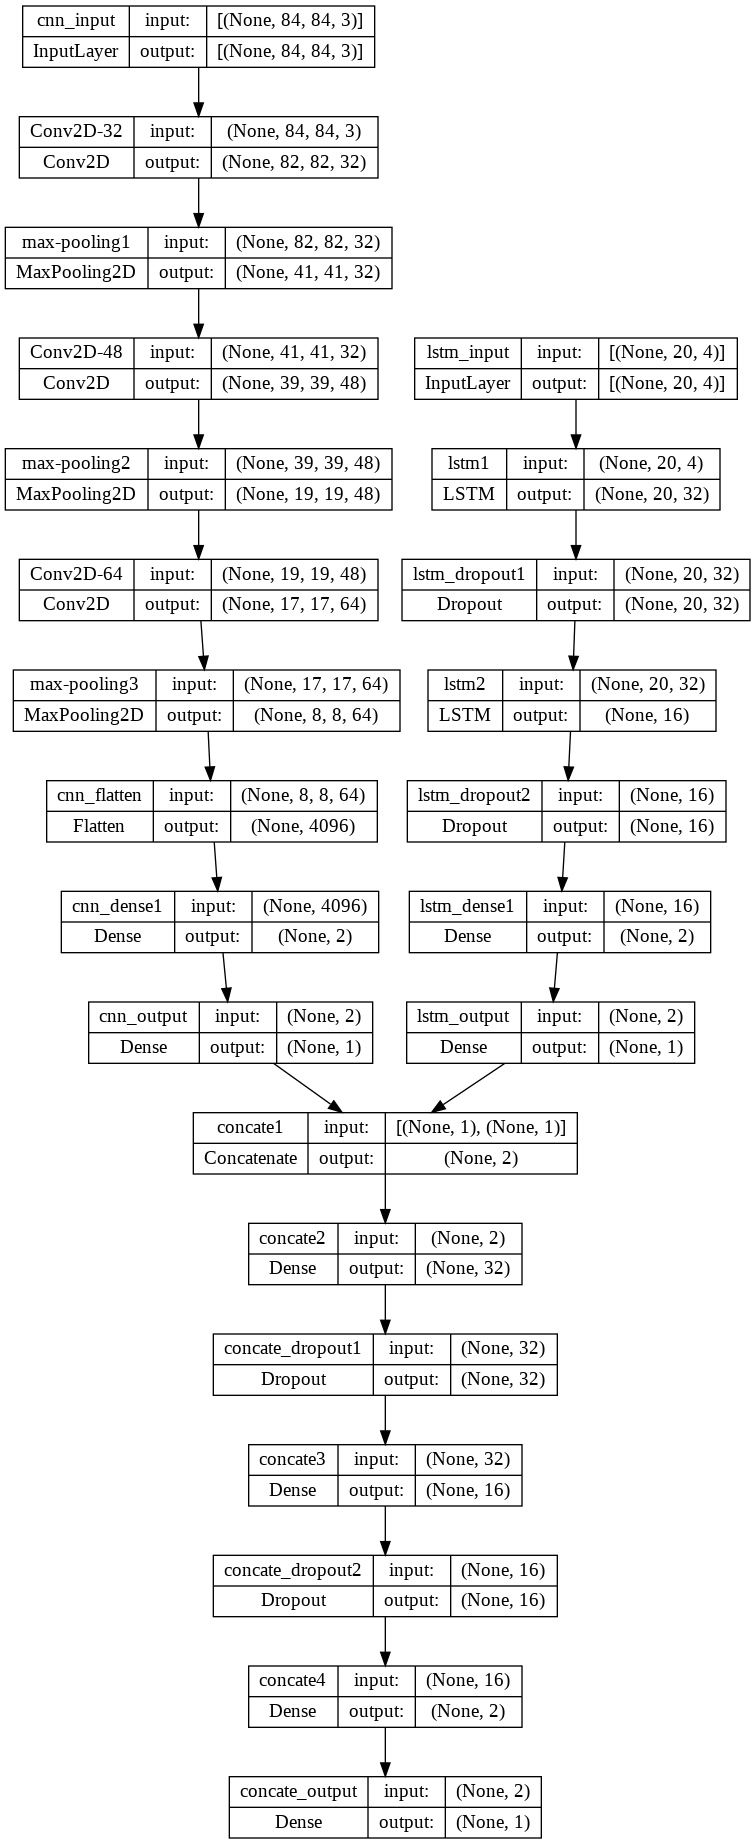

In [97]:
from tensorflow.keras.utils import plot_model

plot_model(LSTM_CNN_model, show_shapes=True)

In [36]:
print(x_train3.shape, x_train.shape, y_train3.shape)

(186, 20, 4) (186, 84, 84, 3) (186,)


In [94]:
history = LSTM_CNN_model.fit([x_train3, x_train], y_train3, validation_split=0.2, shuffle=True, epochs=100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 6s 246ms/step - loss: 1.2712 - accuracy: 0.4662 - val_loss: 0.9866 - val_accuracy: 0.4474
Epoch 2/100
5/5 [==============================] - 1s 114ms/step - loss: 0.8864 - accuracy: 0.4797 - val_loss: 0.8799 - val_accuracy: 0.4474
Epoch 3/100
5/5 [==============================] - 1s 128ms/step - loss: 0.8811 - accuracy: 0.4662 - val_loss: 0.8079 - val_accuracy: 0.4474
Epoch 4/100
5/5 [==============================] - 1s 116ms/step - loss: 0.8296 - accuracy: 0.4797 - val_loss: 0.7579 - val_accuracy: 0.4474
Epoch 5/100
5/5 [==============================] - 1s 120ms/step - loss: 0.7635 - accuracy: 0.5270 - val_loss: 0.7242 - val_accuracy: 0.4474
Epoch 6/100
5/5 [==============================] - 1s 115ms/step - loss: 0.7284 - accuracy: 0.5270 - val_loss: 0.7048 - val_accuracy: 0.4474
Epoch 7/100
5/5 [==============================] - 1s 121ms/step - loss: 0.7451 - accuracy: 0.4392 - val_loss: 0.6959 - val_accuracy: 0.4737
Epoch 8/100
5

In [95]:
LSTM_CNN_model.evaluate([x_test3,x_test], y_test3)

2/2 [==============================] - 0s 44ms/step - loss: 0.7010 - accuracy: 0.5532


[0.700950562953949, 0.5531914830207825]

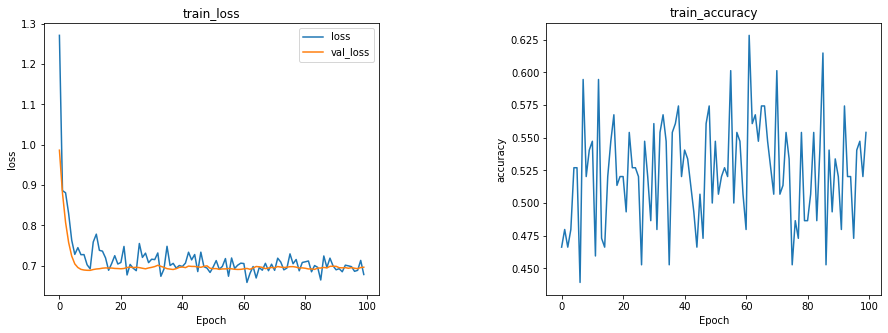

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(121)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()

plt.subplot(122)
plt.title('train_accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'],label='accuracy')